<a href="https://colab.research.google.com/github/AMARNADH09/ML/blob/main/Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the libraries**

In [60]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install pickle-mixin
!pip install seaborn
!pip install Flask


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle


## **Read the Dataset**


In [62]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [63]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [64]:
df.drop(['isFlaggedFraud'],axis =1 ,inplace = True)

In [65]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [67]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [68]:
display(df.describe());

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [69]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [70]:
df.corr(numeric_only=True)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

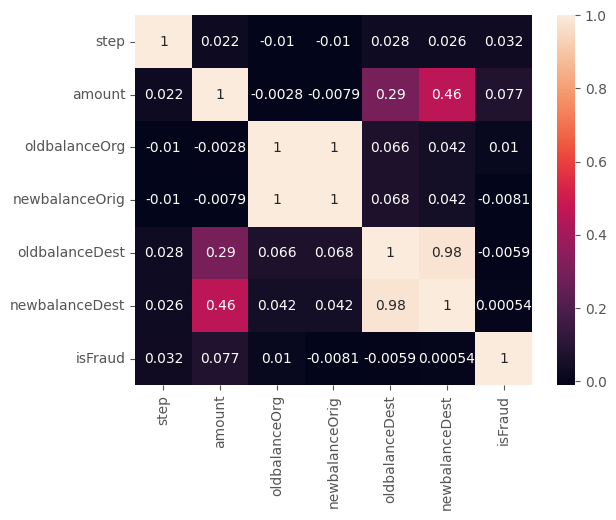

In [71]:
sns.heatmap(df.corr(numeric_only=True),annot = True)


## **Univariate analysis**

<Axes: xlabel='step', ylabel='Count'>

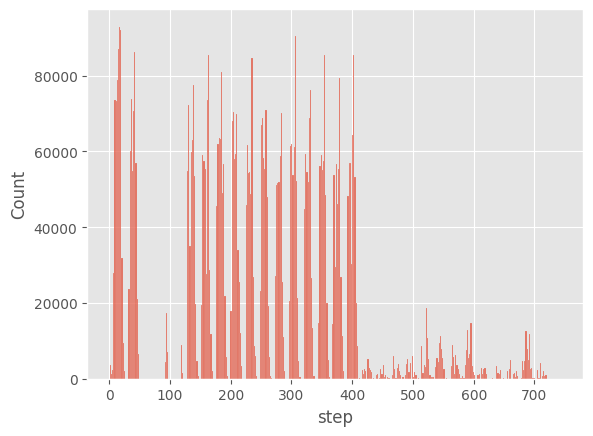

In [72]:
sns.histplot(data = df , x = 'step')

<Axes: xlabel='step'>

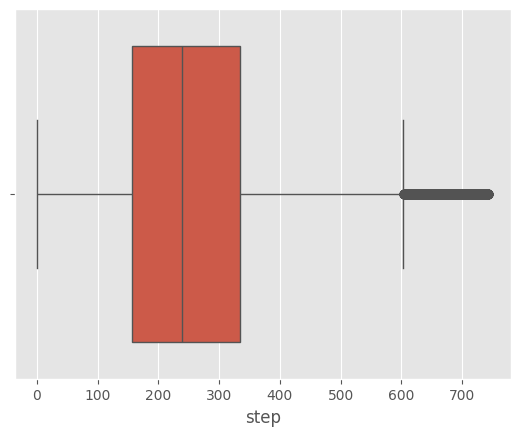

In [73]:
sns.boxplot(data = df , x= 'step')

<Axes: xlabel='type', ylabel='count'>

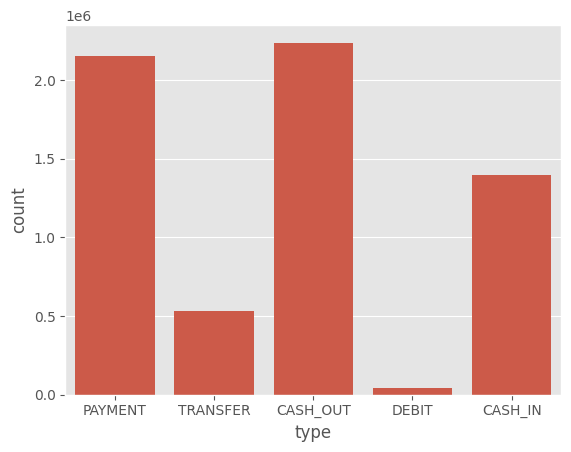

In [74]:
sns.countplot(data = df , x = 'type')

<Axes: xlabel='amount', ylabel='Count'>

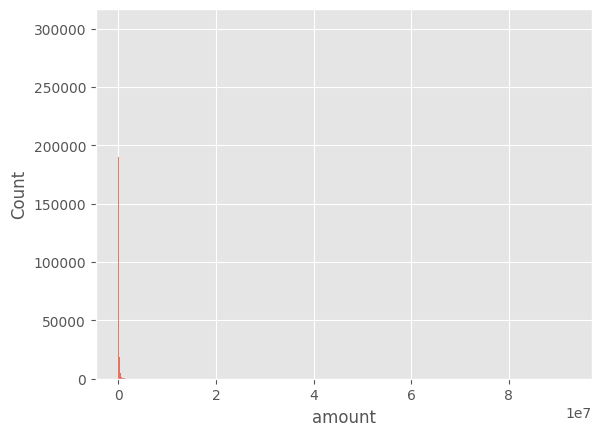

In [75]:
sns.histplot(data = df , x= 'amount')

<Axes: xlabel='amount'>

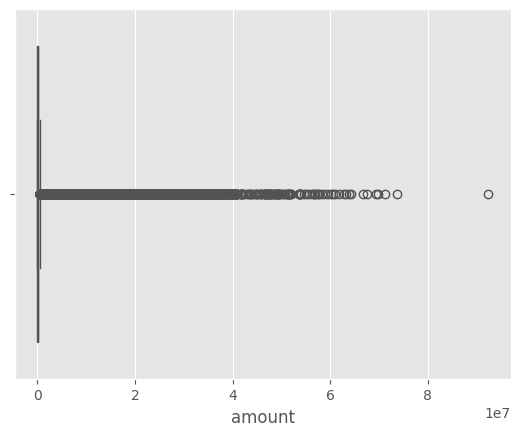

In [76]:
sns.boxplot(data=df , x= 'amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

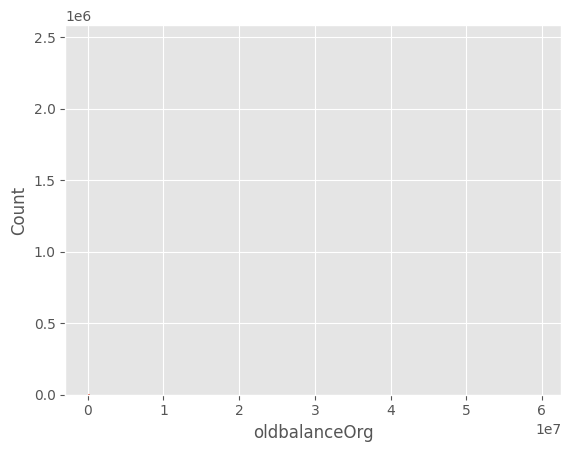

In [77]:
sns.histplot(data = df , x= 'oldbalanceOrg')

In [78]:
df['nameDest'].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


<Axes: xlabel='oldbalanceDest'>

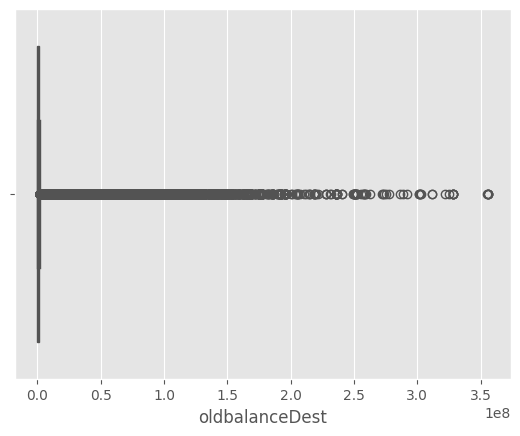

In [79]:
sns.boxplot(data=df , x= 'oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

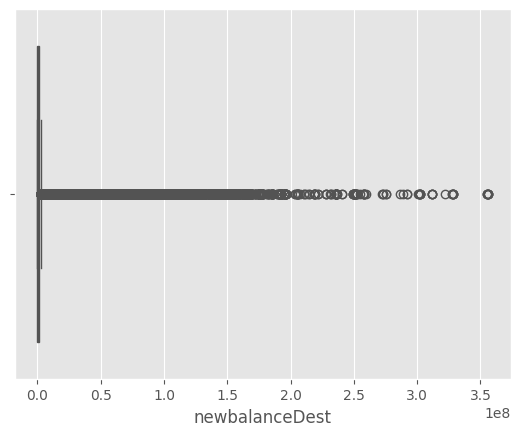

In [80]:
sns.boxplot(data=df , x= 'newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

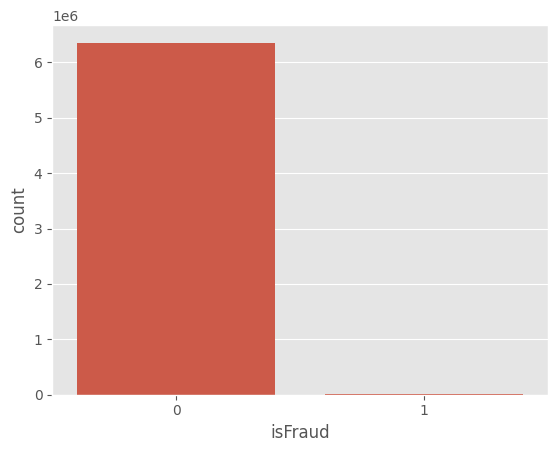

In [81]:
sns.countplot(data=df , x= 'isFraud')

In [82]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [83]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='Fraud'

In [84]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud


## **Bivariate analysis**


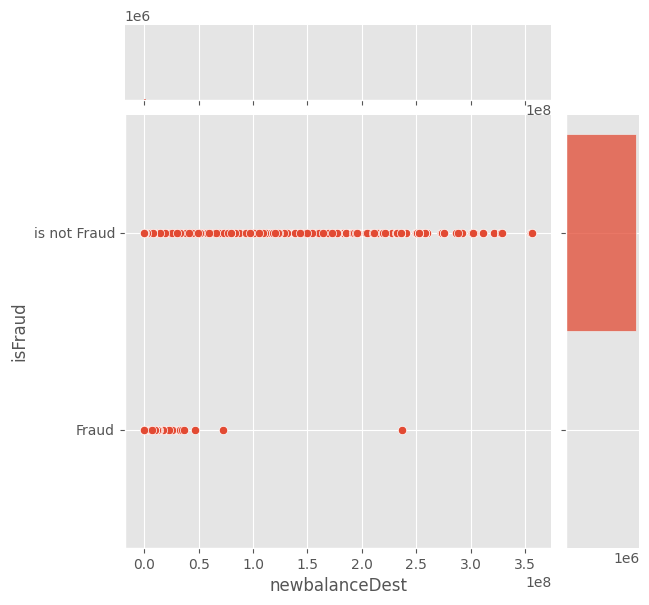

In [85]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

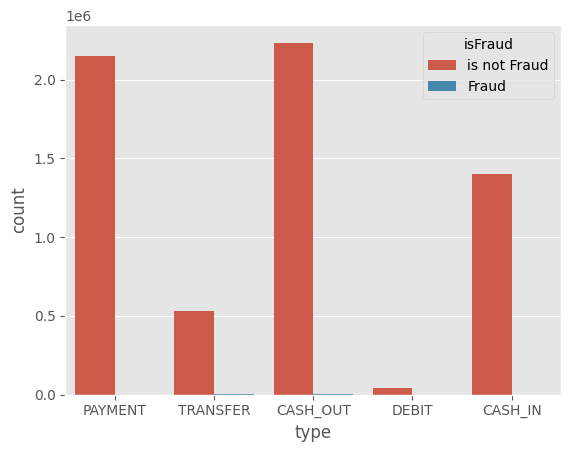

In [86]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

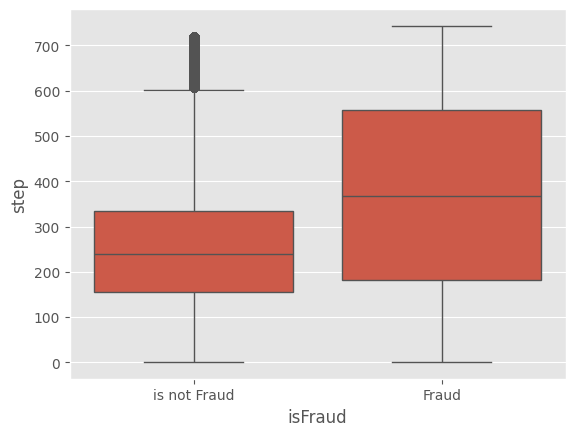

In [87]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

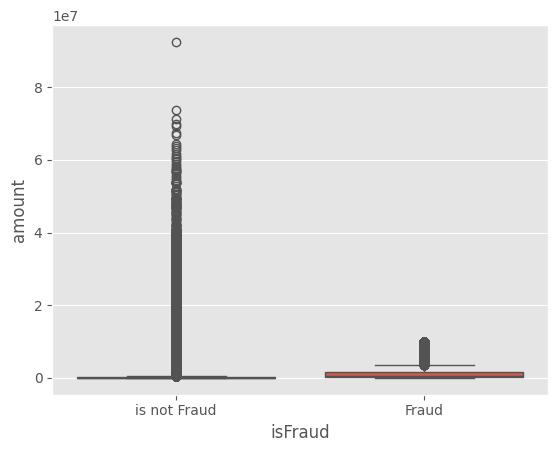

In [88]:
sns.boxplot(data =df , x = 'isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

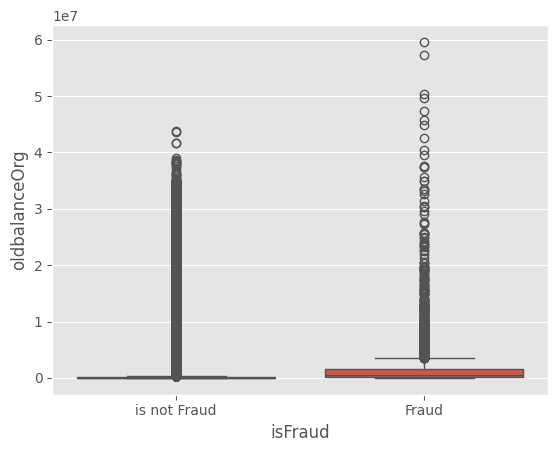

In [89]:
sns.boxplot(data = df , x= 'isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

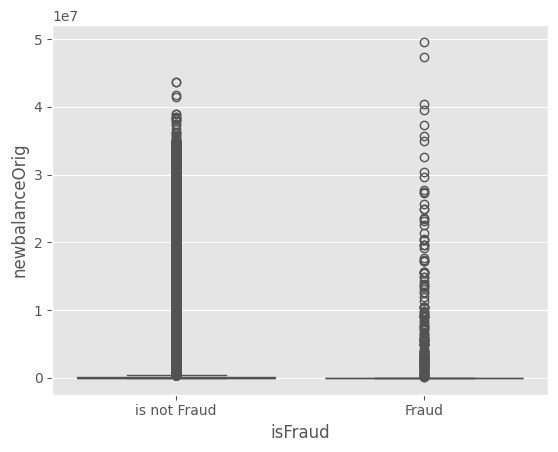

In [90]:
sns.boxplot(data = df , x = 'isFraud' , y = 'newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

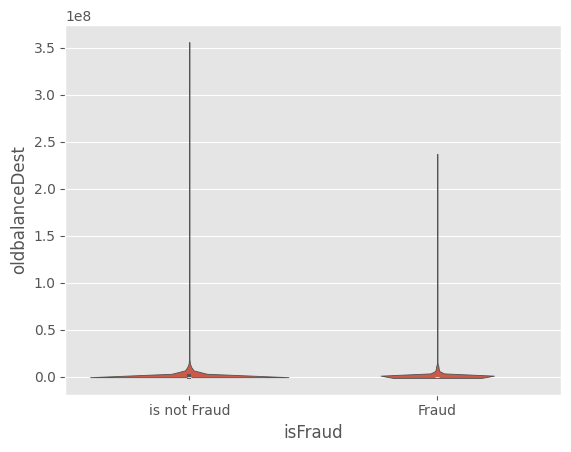

In [91]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

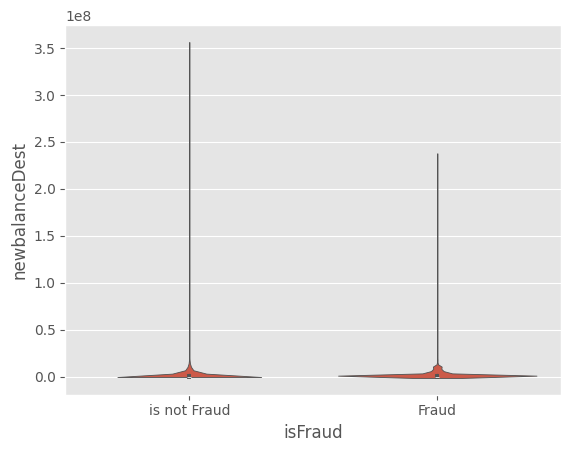

In [92]:
sns.violinplot(data = df ,x = 'isFraud',y='newbalanceDest')

 ## **Descriptive analysis**


In [93]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


 ## **Data Pre-processing**



In [94]:
df.shape

(6362620, 10)

## **Checking for null values**

In [95]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [96]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


In [97]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
dtypes: float64(5), int64(1), object(2)
memory usage: 388.3+ MB


## **Handling outliers**

<Axes: ylabel='amount'>

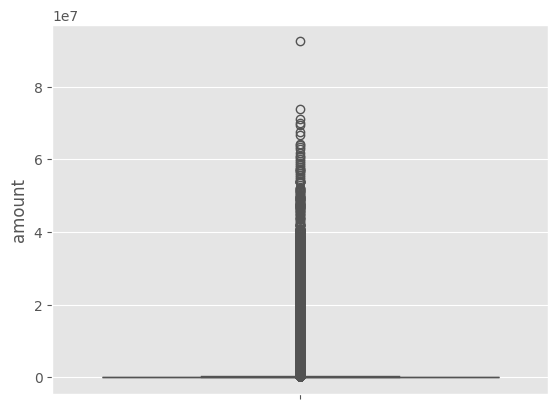

In [99]:
sns.boxplot(df['amount'])

In [100]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [117]:

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR (Q3 - Q1):", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))



Q1 (25th percentile): 9.502231324652017
Q3 (75th percentile): 12.248755998647162
IQR (Q3 - Q1): 2.746524673995145
Lower bound: 5.3824443136593
Upper bound: 16.36854300963988
Skewed data : 1786
Skewed data : 30767


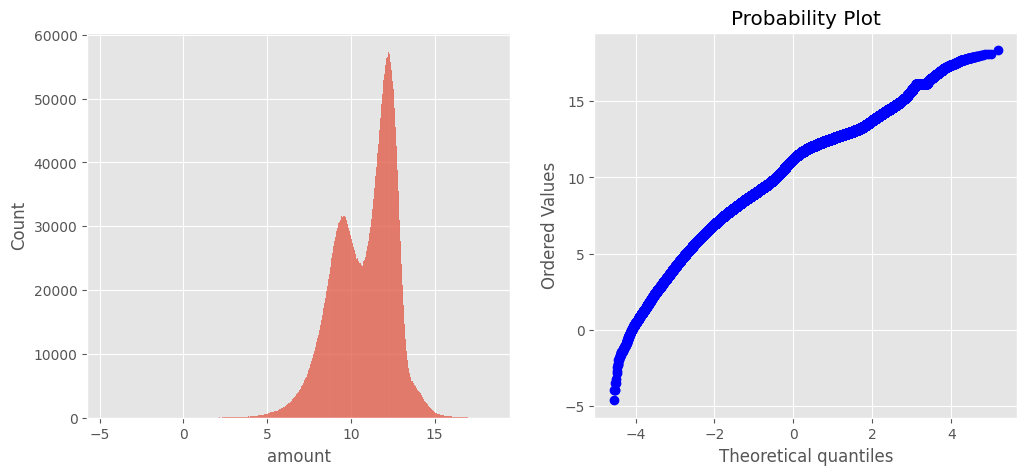

In [102]:
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.histplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature,plot=plt)

transformationPlot(np.log(df['amount']))

In [103]:
df['amount']=np.log(df['amount'])

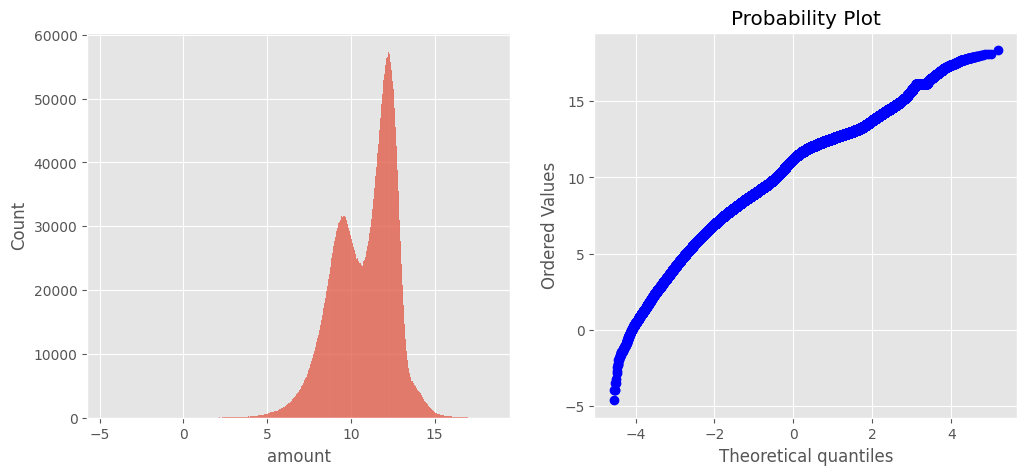

In [104]:
transformationPlot(df['amount'])

## **Object data labelencoding**

In [105]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [106]:
df['type'].value_counts()

,count
type,
1,2237500
3,2151495
0,1399284
4,532909
2,41432


In [107]:
x = df.drop(['isFraud'],axis = 1)
y = df['isFraud']
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735766,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652995,850002.52,0.00,0.00,0.00


In [108]:
y

,isFraud
0,is not Fraud
1,is not Fraud
2,Fraud
3,Fraud
4,is not Fraud
...,...
6362615,Fraud
6362616,Fraud
6362617,Fraud
6362618,Fraud


## **Splitting data into train and test**


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape )

(5090096, 7)
(1272524, 7)
(5090096,)
(1272524,)


## **ModelBuilding**

In [111]:
# Example: Clip all values in x_train and x_test to max 1e9 (adjust as needed)
x_train = np.clip(x_train, -1e9, 1e9)
x_test = np.clip(x_test, -1e9, 1e9)


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## **Random Forest Classifier**

In [113]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [114]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Check the conversion
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [116]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=10, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    SVC(kernel='rbf', probability=True, random_state=42),
    XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
]

for i in range(len(models)):
    if i == 3:
        sample_size = 100000
        models[i].fit(x_train[:sample_size], y_train[:sample_size])
        print(f'{models[i]} : ')

        train_preds = models[i].predict_proba(x_train[:sample_size])[:, 1]
        print('Training Accuracy : ', ras(y_train[:sample_size], train_preds))

        y_preds = models[i].predict_proba(x_test)[:, 1]
        print('Validation Accuracy : ', ras(y_test, y_preds))
        print()
    else:
        models[i].fit(x_train, y_train)
        print(f'{models[i]} : ')

        train_preds = models[i].predict_proba(x_train)[:, 1]
        print('Training Accuracy : ', ras(y_train, train_preds))

        y_preds = models[i].predict_proba(x_test)[:, 1]
        print('Validation Accuracy : ', ras(y_test, y_preds))
        print()


RandomForestClassifier(random_state=42) : 
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.9974278759904448

DecisionTreeClassifier(max_depth=10, random_state=42) : 
Training Accuracy :  0.9611234999043845
Validation Accuracy :  0.9600130426143136

ExtraTreesClassifier(random_state=42) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9929900154450906

SVC(probability=True, random_state=42) : 
Training Accuracy :  0.9414574550115663
Validation Accuracy :  0.9119220169004617

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=Non